In [1]:
import numpy as np
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP
import scipy.optimize as opt
%matplotlib inline

In [11]:
P = 200e3
T_sat = CP.PropsSI('T','P',P,'Q',0,'R12')
p_crit = CP.PropsSI('pcrit','water') / 1000
T_crit = CP.PropsSI('Tcrit','R12')
v_crit = CP.PropsSI('rhocrit','R12')
sigma = CP.PropsSI('I','P',P,'Q',0,'R12')
p_r = P/(p_crit*1e3)
T_r = T_sat/T_crit
v_r = v_crit / CP.PropsSI('D','P',P,'Q',0,'R12')
hlv = CP.PropsSI('H','P',P,'Q',1,'R12') - CP.PropsSI('H','P',P,'Q',0,'R12')
rhov = CP.PropsSI('D','P',P,'Q',1,'R12')
rhol = CP.PropsSI('D','P',P,'Q',0,'R12')
cp = CP.PropsSI('C','P',P,'Q',0,'R12')
kl = CP.PropsSI('L','P',P,'Q',0,'R12')

print(T_sat-273,15,p_crit,T_crit,1/v_crit,p_r,T_r,v_r)

-12.337866573956205 15 22064.0 385.12 0.0017699115044247783 0.009064539521392313 0.6768335413015263 0.39364159931402243


In [156]:
def prvr_vdw(vr):
    return(p_r - (3*vr-2)/vr**3)
v_r = opt.fsolve(prvr_vdw, 0.01)
T_n =(3*v_r-1)**2 / (4*(v_r**3))
dT = T_n*T_crit - T_sat
print(v_r, T_n, dT)

[ 0.66712116] [ 0.84432443] [ 173.23466639]


In [171]:
def prvr_ber(vr):
    return(p_r - 2/np.sqrt(vr) * (2/vr - 
                        3/(3*vr-1)))
v_r = opt.fsolve(prvr_ber, .5)
T_n =(3*v_r-1)**2 / (4*(v_r**3))
dT = T_n*T_crit - T_sat
print(v_r, T_n, dT)

[ 0.6670842] [ 0.84427778] [ 173.20448153]


In [207]:
r = 32e-6
dTmin = 2 * sigma * T_sat / (r*rhov * hlv)
dTmin

1.018956773403474

In [222]:
(np.pi / 24) * rhov * hlv * (sigma * (rhol-rhov)*9.81 / (rhov)**2) ** (1/4)

2967542.744863428

In [253]:
# kutateladze e ivery
qbase = 0.16 * rhov * hlv * (sigma * (rhol-rhov)*9.81 / (rhov)**2) ** (1/4)
Ja = cp * 10 / hlv
rr = rhol/rhov
qbase * (1 + 0.065 * rr**0.8 * Ja),qbase * (1 + 0.065 * rr**0.8 * Ja)/10

(2260215.632806822, 226021.56328068223)

In [257]:
# zuber
prandtl = (kl * cp * rhol) ** (1/2)
A = ((rhol-rhov)*9.81/sigma)**(1/4)
B = rhov * hlv * (sigma * (rhol-rhov)*9.81 / (rhov)**2) ** (1/8)
csi = 5.32 * A * prandtl * 10 / B
qbase * (1 + csi), qbase * (1 + csi)/10

(2378243.1276864726, 237824.31276864727)

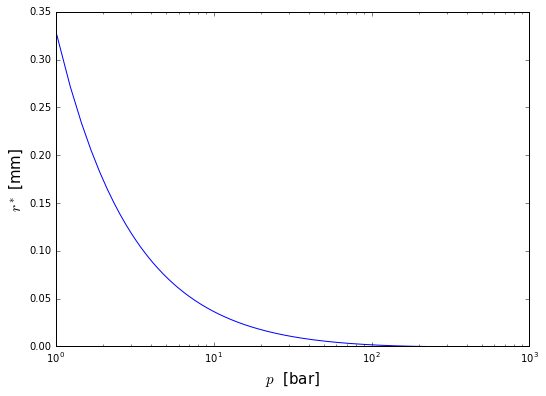

In [280]:
pp = np.linspace(101325,p_crit*1e3-100,1000)
rcrit = []
for p in pp:
    T_sat = CP.PropsSI('T','P',p,'Q',0,'water')
    sigma = CP.PropsSI('I','P',p,'Q',0,'water')
    hlv = CP.PropsSI('H','P',p,'Q',1,'water') - CP.PropsSI('H','P',p,'Q',0,'water')
    rhov = CP.PropsSI('D','P',p,'Q',1,'water')
    rhol = CP.PropsSI('D','P',p,'Q',0,'water')
    rcrit.append(2 * sigma * T_sat * (1/rhov-1/rhol)/
                hlv*10)
rcrit = np.array(rcrit)
fig1 = plt.figure(figsize=(6*np.sqrt(2),6))
ax1 = fig1.add_subplot(1,1,1)
ax1.semilogx(pp*1e-5,rcrit*1e3)
ax1.set_ylabel(r'$r^*$ [mm]', fontsize=15)
ax1.set_xlabel(r'$p$  [bar]', fontsize=15)

In [289]:
ssqrt = np.sqrt(1 - 12.8 * sigma * T_sat / (rhov * hlv * 5e-6 * (10+273.15-T_sat)))
(5e-6/4) * (1  + ssqrt)*1e3

0.0023590493135600267

/home/julionaojulho/.local/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt


[None, None]

/usr/lib/python3/dist-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


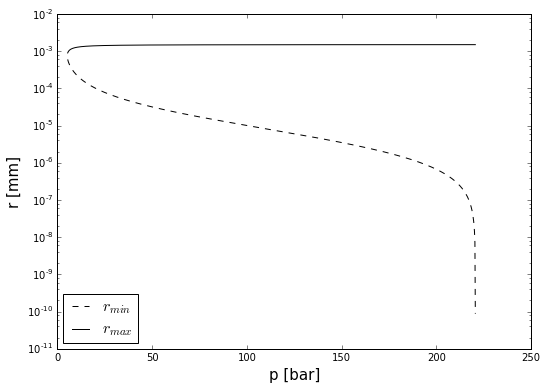

In [35]:
pp = np.linspace(101325,p_crit*1e3-100,1000)
rmin, rmax = [],[]
for p in pp:
    T_sat = CP.PropsSI('T','P',p,'Q',0,'water')
    sigma = CP.PropsSI('I','P',p,'Q',0,'water')
    hlv = CP.PropsSI('H','P',p,'Q',1,'water') - CP.PropsSI('H','P',p,'Q',0,'water')
    rhov = CP.PropsSI('D','P',p,'Q',1,'water')
    rhol = CP.PropsSI('D','P',p,'Q',0,'water')
    ssqrt = np.sqrt(1 - 12.8 * sigma * T_sat / (rhov * hlv * 3e-6 * (15)))
    rmin.append((1-ssqrt)*3e-6/4)
    rmax.append((1+ssqrt)*3e-6/4)
    
rmin = np.array(rmin)
rmax = np.array(rmax)
fig1 = plt.figure(figsize=(6*np.sqrt(2),6))
ax1 = fig1.add_subplot(1,1,1)
ax1.semilogy(pp*1e-5,rmin*1e3,'k--',label=r'$r_{min}$')
ax1.semilogy(pp*1e-5,rmax*1e3,color='black',label=r'$r_{max}$')
ax1.set_ylabel('r [mm]', fontsize=15)
ax1.set_xlabel('p [bar]', fontsize=15)
l = ax1.legend(loc='best')
plt.setp(plt.gca().get_legend().get_texts(), fontsize='16') 

/home/julionaojulho/.local/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt


-0.541619723179 0.293351924536 16.716147888701048
-0.540946322506 0.292622923832 16.709307633171203
-0.540272921832 0.291894830065 16.702470592908
-0.539599521159 0.291167643235 16.695636766151196
-0.538926120485 0.290441363341 16.68880615126006
-0.538252719812 0.289715990385 16.681978746515394
-0.537579319139 0.288991524365 16.675154550239316
-0.536905918465 0.288267965283 16.66833356069459
-0.536232517792 0.287545313137 16.661515776185585
-0.535559117118 0.286823567929 16.654701195075898
-0.534885716445 0.286102729657 16.647889815612366
-0.534212315772 0.285382798322 16.641081636121555
-0.533538915098 0.284663773924 16.634276654911268
-0.532865514425 0.283945656463 16.62747487029027
-0.532192113751 0.283228445939 16.6206762805687
-0.531518713078 0.282512142352 16.613880884056762
-0.530845312405 0.281796745702 16.60708867904722
-0.530171911731 0.281082255989 16.6002996639109
-0.529498511058 0.280368673212 16.59351383688371
-0.528825110384 0.279655997373 16.586731196358574
-0.528151709

[None, None]

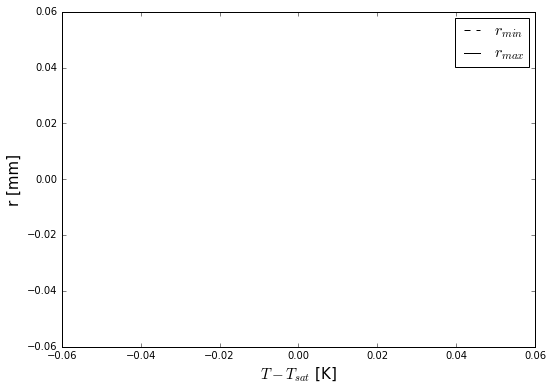

In [73]:
tt = np.linspace(350,351,100)
rmin, rmax = [],[]
for p in tt:
    T_sat = CP.PropsSI('T','P',101325,'Q',0,'water')
    sigma = CP.PropsSI('I','T',p,'Q',0,'water')
    hlv = CP.PropsSI('H','T',p,'Q',1,'water') - CP.PropsSI('H','T',p,'Q',0,'water')
    rhov = CP.PropsSI('D','T',p,'Q',1,'water')
    rhol = CP.PropsSI('D','T',p,'Q',0,'water')
    ssqrt = np.sqrt((1-(T_sat-p)/15)**2 - 12.8 * sigma * T_sat / (rhov * hlv * 2e-6 * (15)))
    print(1-(T_sat - p)/15,(1-(T_sat - p)/15)**2,12.8 * sigma * T_sat / (rhov * hlv * 2e-6 * (15)))
    rmin.append((1-(T_sat-p)/15-ssqrt)*2e-6/4)
    rmax.append((1-(T_sat-p)/15+ssqrt)*2e-6/4)

tt = T_sat - tt
rmin = np.array(rmin)
rmax = np.array(rmax)
fig1 = plt.figure(figsize=(6*np.sqrt(2),6))
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(tt,rmin*1e3,'k--',label=r'$r_{min}$')
ax1.plot(tt,rmax*1e3,color='black',label=r'$r_{max}$')
ax1.set_ylabel('r [mm]', fontsize=15)
ax1.set_xlabel(r'$T-T_{sat}$ [K]', fontsize=15)
l = ax1.legend(loc='best')
plt.setp(plt.gca().get_legend().get_texts(), fontsize='16') 

In [60]:
np.sqrt(1 - 12.8 * sigma * T_sat / (rhov * hlv * 2e-6 * (15)))

/home/julionaojulho/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


nan

In [70]:
rmax

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan])